In [1]:
from as4012_sstr import reader
import pandas as pd

# Provide the file path as a string if it's in the same folder
table = reader.read_history("trimmed_history.data")

In [2]:
x_fraction = table['center_h1']  # Hydrogen mass fraction (X)
y_fraction = table['center_he4']  # Helium mass fraction (Y)
z_fraction = (1 - x_fraction - y_fraction)  # Metals mass fraction (Z), assuming everything else is metals
x_c_fraction = table['center_c12']  # Carbon mass fraction (X_c)
ages = table['star_age']
log_L = table['log_L']
log_Teff = table['log_Teff']
log_rho = table['log_center_Rho']

## 5

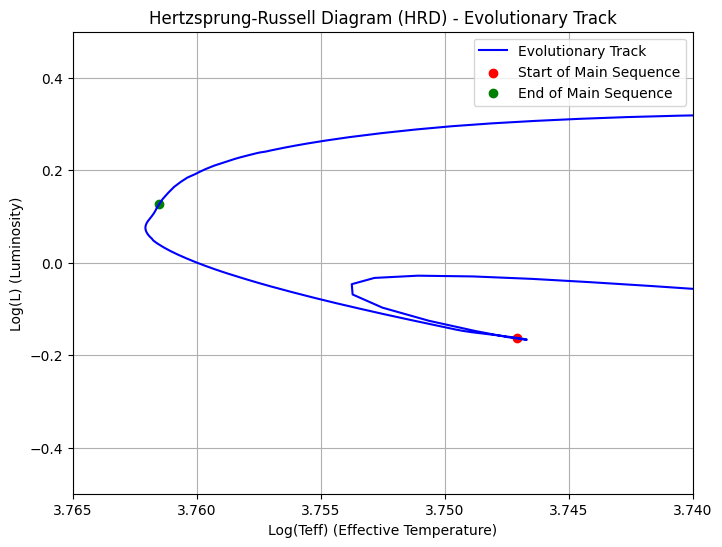

Start of main sequence Age: 5.97e+07 years
End of Main Sequence Age: 8.22e+09 years


In [3]:
import matplotlib.pyplot as plt
import numpy as np 

luminosity_min = -0.2
luminosity_max = 0.2

# Filter the table to only include stars within the main sequence luminosity range
filtered_data = table[(table['log_L'] >= luminosity_min) & (table['log_L'] <= luminosity_max)]

# Define the start and end of main sequence log(Teff) values
start_Teff = 3.747  # Log(Teff) for ZAMS
end_Teff = 3.7615  # Log(Teff) for end of main sequence

# Find the indices where log_Teff is closest to start_Teff and end_Teff
start_index = np.abs(filtered_data['log_Teff'] - start_Teff).argmin()
end_index = np.abs(filtered_data['log_Teff'] - end_Teff).argmin()

start_Teff_value = filtered_data['log_Teff'][start_index]
start_L_value = filtered_data['log_L'][start_index]

end_Teff_value = filtered_data['log_Teff'][end_index]
end_L_value = filtered_data['log_L'][end_index]

#Plot the evolutionary track of the star in the HRD (log(Teff) vs log(L))
plt.figure(figsize=(8, 6))

# Plot log(Teff) vs log(L) for all timesteps in the model
plt.plot(table['log_Teff'], table['log_L'], label='Evolutionary Track', color='blue')
plt.scatter(start_Teff_value, start_L_value, color='red', marker='o', label='Start of Main Sequence')
plt.scatter(end_Teff_value, end_L_value, color='green', marker='o', label='End of Main Sequence')

# Focus the plot around the main sequence (log(Teff) ~ 3.6 to 3.8, log(L) ~ -0.4 to 0.5)
plt.xlim(3.74, 3.765)  # Zoom in around log(Teff) ~ 3.7
plt.ylim(-0.5, 0.5)  # Zoom in around log(L) ~ 0.0

plt.xlabel('Log(Teff) (Effective Temperature)')
plt.ylabel('Log(L) (Luminosity)')
plt.title('Hertzsprung-Russell Diagram (HRD) - Evolutionary Track')
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()  # Invert the x-axis
plt.show()


print(f"Start of main sequence Age: {filtered_data["star_age"][start_index]:.2e} years")
print(f"End of Main Sequence Age: {filtered_data["star_age"][end_index]:.2e} years")


these ages agree roughly with the main sequence lifetime of the sun

## 6

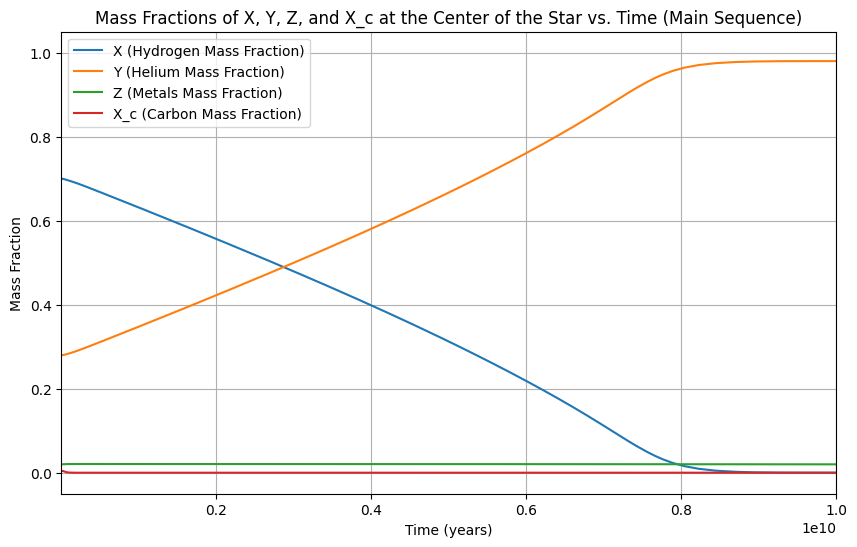

In [4]:
# Assuming these are the correct columns for X, Y, Z, and X_c (adjust if different in your dataset)
x_fraction = table['center_h1']  # Hydrogen mass fraction (X)
y_fraction = table['center_he4']  # Helium mass fraction (Y)
z_fraction = (1 - x_fraction - y_fraction)  # Metals mass fraction (Z), assuming everything else is metals
x_c_fraction = table['center_c12']  # Carbon mass fraction (X_c)


#Plot the mass fractions of X, Y, Z, and X_c as a function of time
plt.figure(figsize=(10, 6))
plt.plot(ages, x_fraction, label="X (Hydrogen Mass Fraction)")
plt.plot(ages, y_fraction, label="Y (Helium Mass Fraction)")
plt.plot(ages, z_fraction, label="Z (Metals Mass Fraction)")
plt.plot(ages, x_c_fraction, label="X_c (Carbon Mass Fraction)")

#Add labels and a legend
plt.xlabel("Time (years)")
plt.ylabel("Mass Fraction")
plt.title("Mass Fractions of X, Y, Z, and X_c at the Center of the Star vs. Time (Main Sequence)")
plt.legend()
plt.grid(True)
#plt.yscale("log")  #log scale for better visualisation of less abundant elements
#plt.xscale("log")  #log scale for time 

plt.xlim(10**7, 10**10) 
#plt.ylim(10**-12,10**1)

# Show the plot
plt.show()

In [5]:
# Define the target star age
target_star_age = 10**7  # 10^7 years

# Find the row in main_sequence_data that is closest to the target star age
closest_row_index = np.abs(table['star_age'] - target_star_age).argmin()

# Extract the fractions at the closest star age
x_fraction_at_target_age = table['center_h1'][closest_row_index]
y_fraction_at_target_age = table['center_he4'][closest_row_index]
z_fraction_at_target_age = 1 - x_fraction_at_target_age - y_fraction_at_target_age
x_c_fraction_at_target_age = table['center_c12'][closest_row_index]

# Print the fractions
print(f"At star age {target_star_age:.2e} years:")
print(f"Hydrogen Mass Fraction (X): {x_fraction_at_target_age:.4f}")
print(f"Helium Mass Fraction (Y): {y_fraction_at_target_age:.4f}")
print(f"Metals Mass Fraction (Z): {z_fraction_at_target_age:.4f}")
print(f"Carbon Mass Fraction (X_c): {x_c_fraction_at_target_age:.4f}")





At star age 1.00e+07 years:
Hydrogen Mass Fraction (X): 0.7000
Helium Mass Fraction (Y): 0.2800
Metals Mass Fraction (Z): 0.0200
Carbon Mass Fraction (X_c): 0.0041


## 7

To more acurately determine the ZAMS of the sun a plot of the Luminosity and temperature vs time can be made. We know that on the main sequence these quantities remaine almost constant so we can then determine at what point in time they become constant

Estimated ZAMS Age: 4.61e+07 years
ZAMS Model Number: 245


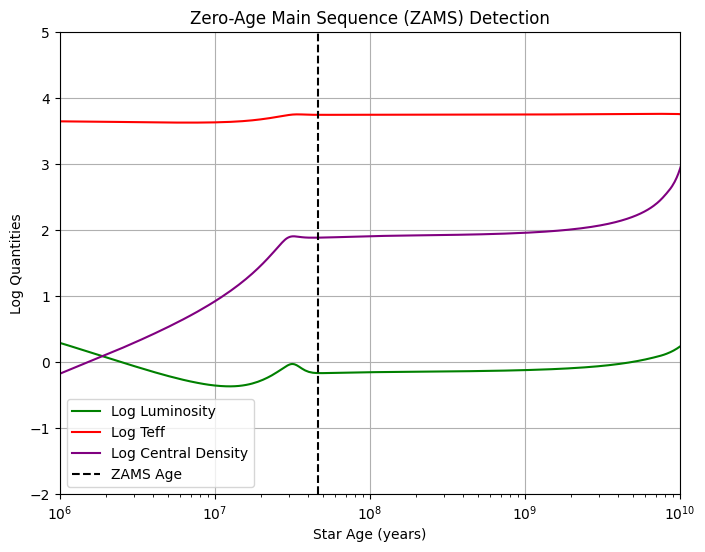

In [6]:
# Load in relevant tables 
ages = table['star_age']
log_L = table['log_L']
log_Teff = table['log_Teff']
log_rho = table['log_center_Rho']

# Compute the gradients of luminocity, temperature and density
grad_L = np.abs(np.gradient(log_L, ages))
grad_Teff = np.abs(np.gradient(log_Teff, ages))
grad_rho = np.abs(np.gradient(log_rho, ages))

# Set a threshold for "leveling off" condition
threshold = 1e-9 #adjust until a good fit is reached

# Find indices where all three gradients are below the threshold
leveling_off_indices = np.where((grad_L < threshold) & (grad_Teff < threshold) & (grad_rho < threshold))[0]

# Ensure stability by checking consecutive values
if len(leveling_off_indices) > 0:
    for i in range(len(leveling_off_indices) - 3):  # Look for 3+ stable points in a row
        if (leveling_off_indices[i+1] == leveling_off_indices[i] + 1 and
            leveling_off_indices[i+2] == leveling_off_indices[i] + 2):
            zams_index = leveling_off_indices[i]  # First occurrence of stability
            break
    else:
        zams_index = leveling_off_indices[0]  # If no stable stretch, pick first occurrence
else:
    print("No clear ZAMS found.")
    zams_index = None

# Output results
if zams_index is not None:
    zams_age = ages[zams_index]
    zams_model = table['model_number'][zams_index]
    print(f"Estimated ZAMS Age: {zams_age:.2e} years")
    print(f"ZAMS Model Number: {zams_model}")

    # Plot the functions with ZAMS marked
    plt.figure(figsize=(8, 6))
    plt.plot(ages, log_L, label='Log Luminosity', color='green')
    plt.plot(ages, log_Teff, label='Log Teff', color='red')
    plt.plot(ages, log_rho, label='Log Central Density', color='purple')
    plt.axvline(x=zams_age, color='black', linestyle='--', label='ZAMS Age')
    plt.xlabel('Star Age (years)')
    plt.xscale('log')
    plt.ylabel('Log Quantities')
    plt.title('Zero-Age Main Sequence (ZAMS) Detection')
    plt.legend()
    plt.xlim(10**6, 10**10)
    plt.ylim(-2,5)
    plt.grid()
    plt.show()


## 8

In [7]:
log_R = table['log_R']
#Get the values of L,R and T at the ZAMS
L = 10**(log_L[246])
R = 10**(log_R[246])
T = 10**(log_Teff[246])

#output values of L,R and T at the ZAMS
print("Luminosity at ZAMS:", L)
print("Radius at ZAMS:", R)
print("Effective Temperature at ZAMS:", T)


Luminosity at ZAMS: 0.684254213506428
Radius at ZAMS: 0.8854961630828264
Effective Temperature at ZAMS: 5582.65058529646


## 9

In [8]:

table = reader.find_read_profile(r"d:\SSTR_Assignment\MESA-Web_Job_02182540892\profiles.index", 245, nearest=True)
print(table.meta)
grad_rad = table["gradr"]
grad_ad = table["grada"]
mass = table["mass"]
eps_nuc = table["eps_nuc"]

{'model_number': 244, 'num_zones': 472, 'initial_mass': 1.0, 'initial_z': 0.02, 'star_age': 43020069.65187602, 'time_step': 2591122.0237278584, 'Teff': 5590.602498214642, 'photosphere_L': 0.689970778053087, 'photosphere_r': 0.8866596739165293, 'center_eta': -1.7713262411886885, 'center_h1': 0.6992549741177203, 'center_he3': 7.334072951023975e-05, 'center_he4': 0.2805279715272843, 'center_c12': 0.0032570725161702135, 'center_n14': 0.002212782380449513, 'center_o16': 0.01120382849150831, 'center_ne20': 0.0025129237964844936, 'star_mass': 0.9999972066471807, 'star_mdot': -2.5458442936440015e-14, 'star_mass_h1': 0.6998721707259882, 'star_mass_he3': 8.00034549910135e-05, 'star_mass_he4': 0.2800321372564903, 'star_mass_c12': 0.0040416691377233175, 'star_mass_n14': 0.0012973645509741546, 'star_mass_o16': 0.01120384097667546, 'star_mass_ne20': 0.0025129167770017234, 'he_core_mass': 0.0, 'c_core_mass': 0.0, 'o_core_mass': 0.0, 'si_core_mass': 0.0, 'fe_core_mass': 0.0, 'neutron_rich_core_mass': 

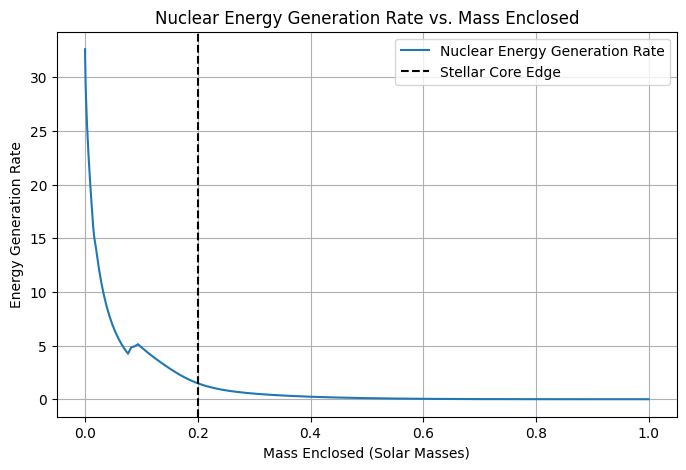

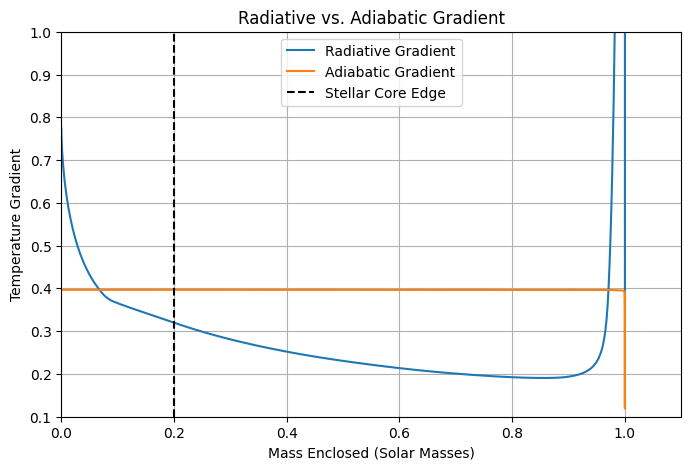

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(mass, eps_nuc, label="Nuclear Energy Generation Rate")
plt.axvline(x=0.2, linestyle="--", color="black", label="Stellar Core Edge")
plt.xlabel("Mass Enclosed (Solar Masses)")
plt.ylabel("Energy Generation Rate")
plt.title("Nuclear Energy Generation Rate vs. Mass Enclosed")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(mass, grad_rad, label="Radiative Gradient")
plt.plot(mass, grad_ad, label="Adiabatic Gradient")
plt.axvline(x=0.2, linestyle="--", color="black", label="Stellar Core Edge")  # No duplicate label
plt.xlabel("Mass Enclosed (Solar Masses)")
plt.ylabel("Temperature Gradient")
plt.legend()
plt.title("Radiative vs. Adiabatic Gradient")
plt.grid()
plt.xlim(0, 1.1)
plt.ylim(10**-1, 10**0)  # Check if these limits capture all features
plt.show()


## 11

Estimated ZAMS Age: 1.40e+07 years
ZAMS Model Number: 263


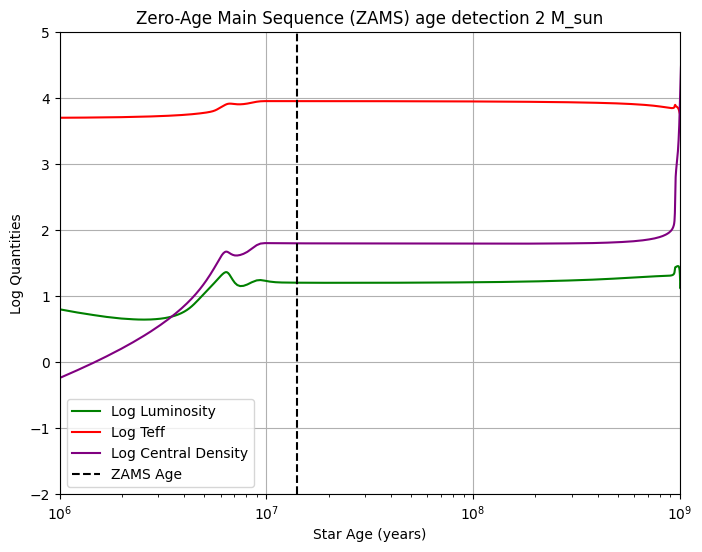

In [10]:
table = reader.read_history("D:/SSTR_Assignment/MESA-Web_Job_02262541236/MESA-Web_Job_02262541236/trimmed_history.data")

# Load in relevant tables 
ages = table['star_age']
log_L = table['log_L']
log_Teff = table['log_Teff']
log_rho = table['log_center_Rho']

# Compute the gradients of luminocity, temperature and density
grad_L = np.abs(np.gradient(log_L, ages))
grad_Teff = np.abs(np.gradient(log_Teff, ages))
grad_rho = np.abs(np.gradient(log_rho, ages))

# Set a threshold for "leveling off" condition
threshold = 1e-9 #adjust until a good fit is reached

# Find indices where all three gradients are below the threshold
leveling_off_indices = np.where((grad_L < threshold) & (grad_Teff < threshold) & (grad_rho < threshold))[0]

# Ensure stability by checking consecutive values
if len(leveling_off_indices) > 0:
    for i in range(len(leveling_off_indices) - 3):  # Look for 3+ stable points in a row
        if (leveling_off_indices[i+1] == leveling_off_indices[i] + 1 and
            leveling_off_indices[i+2] == leveling_off_indices[i] + 2):
            zams_index = leveling_off_indices[i]  # First occurrence of stability
            break
    else:
        zams_index = leveling_off_indices[0]  # If no stable stretch, pick first occurrence
else:
    print("No clear ZAMS found.")
    zams_index = None

# Output results
if zams_index is not None:
    zams_age = ages[zams_index]
    zams_model = table['model_number'][zams_index]
    print(f"Estimated ZAMS Age: {zams_age:.2e} years")
    print(f"ZAMS Model Number: {zams_model}")

    # Plot the functions with ZAMS marked
    plt.figure(figsize=(8, 6))
    plt.plot(ages, log_L, label='Log Luminosity', color='green')
    plt.plot(ages, log_Teff, label='Log Teff', color='red')
    plt.plot(ages, log_rho, label='Log Central Density', color='purple')
    plt.axvline(x=zams_age, color='black', linestyle='--', label='ZAMS Age')

    plt.xlabel('Star Age (years)')
    plt.xscale('log')
    plt.ylabel('Log Quantities')
    plt.title('Zero-Age Main Sequence (ZAMS) age detection 2 M_sun')
    plt.legend()
    plt.xlim(10**6, 10**9)
    plt.ylim(-2,5)
    plt.grid()
    plt.show()


In [11]:
table = reader.find_read_profile("D:/SSTR_Assignment/MESA-Web_Job_02262541236/MESA-Web_Job_02262541236/profiles.index", 263, nearest=True)
print(table.meta)
grad_rad = table["gradr"]
grad_ad = table["grada"]
mass = table["mass"]
eps_nuc = table["eps_nuc"]

{'model_number': 266, 'num_zones': 498, 'initial_mass': 2.0, 'initial_z': 0.02, 'star_age': 19126369.40384985, 'time_step': 2018909.7163076864, 'Teff': 9000.916038168498, 'photosphere_L': 15.918262561035064, 'photosphere_r': 1.6429836712976726, 'center_eta': -2.6576001452072338, 'center_h1': 0.6947170998028878, 'center_he3': 5.536145771652675e-06, 'center_he4': 0.28462139304283424, 'center_c12': 3.540001136390593e-05, 'center_n14': 0.00614421654384777, 'center_o16': 0.011006324215937426, 'center_ne20': 0.002512923796484494, 'star_mass': 1.9999883678001302, 'star_mdot': -3.9251020145311736e-13, 'star_mass_h1': 1.3979760102981666, 'star_mass_he3': 9.403741381895262e-05, 'star_mass_he4': 0.5615302696310444, 'star_mass_c12': 0.005865838349213145, 'star_mass_n14': 0.005232163559694494, 'star_mass_o16': 0.022350028437563084, 'star_mass_ne20': 0.005025818362137131, 'he_core_mass': 0.0, 'c_core_mass': 0.0, 'o_core_mass': 0.0, 'si_core_mass': 0.0, 'fe_core_mass': 0.0, 'neutron_rich_core_mass': 

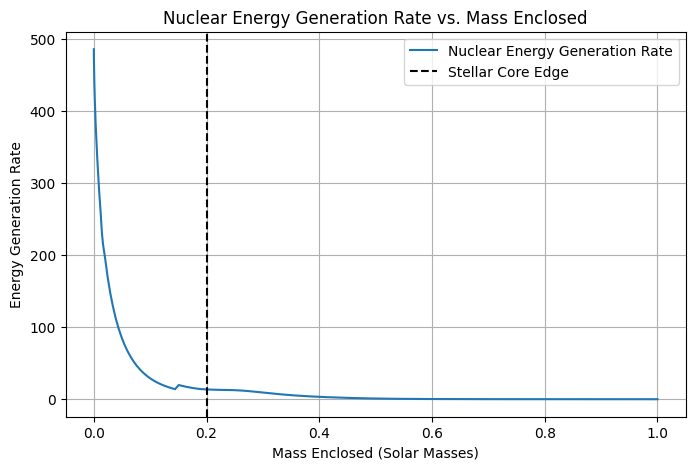

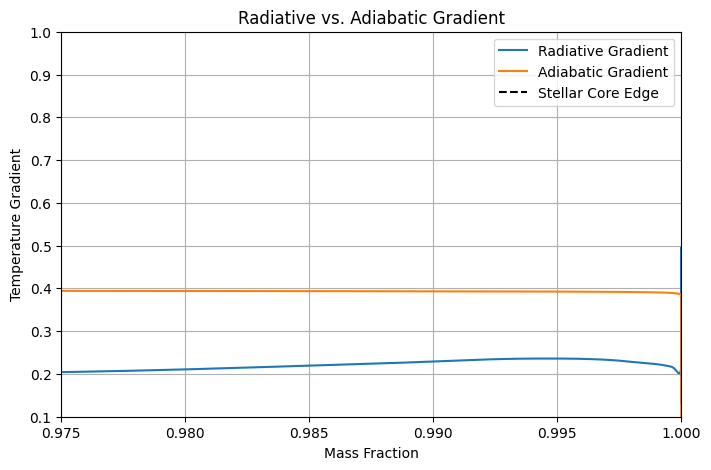

In [14]:
mass = mass/mass[-1]


plt.figure(figsize=(8, 5))
plt.plot(mass, eps_nuc, label="Nuclear Energy Generation Rate")
plt.axvline(x=0.2, linestyle="--", color="black", label="Stellar Core Edge")
plt.xlabel("Mass Enclosed (Solar Masses)")
plt.ylabel("Energy Generation Rate")
plt.title("Nuclear Energy Generation Rate vs. Mass Enclosed")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(mass, grad_rad, label="Radiative Gradient")
plt.plot(mass, grad_ad, label="Adiabatic Gradient")
plt.axvline(x=0.2, linestyle="--", color="black", label="Stellar Core Edge")  # No duplicate label
plt.xlabel("Mass Fraction")
plt.ylabel("Temperature Gradient")
plt.legend()
plt.title("Radiative vs. Adiabatic Gradient")
plt.grid()
plt.xlim(0.975, 1)
plt.ylim(10**-1, 10**0)  # Check if these limits capture all features
plt.show()
